<a href="https://colab.research.google.com/github/suponev/model/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Массив M
(-0.4407166847541519-0.920365823548773j)
(0.5459938448513592+0.8436401575456269j)

Массив А
(-3.9499582533807716-0.08553513484771205j)
(5.00056265224814+0.08553513484771205j)

Массив m (сдвиги)
(-4.034761588722187-0.04047420160952131j)
(1.992800798791633-0.009789916045995209j)


/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 1440x216 with 0 Axes>

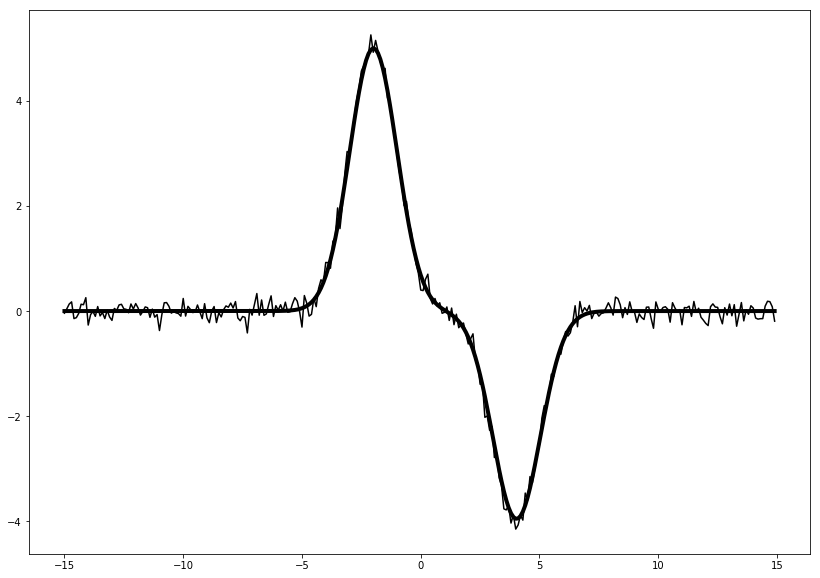

In [17]:
import random
import numpy as np 
import matplotlib.pyplot as plt

# Сигма
sig = 1

# Константа h
h = 0.5

# Массив значений x
x = np.arange(-15, 15 , 0.1);


# Задание сигнала
def rnd(x):
    return 
  
# Задание сигнала
def signal(x):
    return 5*np.exp(-(x+2)**2/(2*sig**2))-4*np.exp(-(x-4)**2/(2*sig**2))
  
# Задание аппроксимирующей функции
def phi(x):
    return np.exp(-(x)**2/(2*sig**2)) 
# Задание аппроксимирующей функции
def model(x , A ,m):
    return A[0]*phi(x+m[0])+A[1]*phi(x+m[1])#+A[0]*phi(x-m[0])
  
# Расчет мемента k (для исходного сигнала) 
def mu(signal,k):
    return signal*np.exp(-1j*k*h*x)
  
# Расчет alpha (для аппрокимирующей функции)
def alpha(x,k):
    return phi(x)*np.exp(-1j*h*k*x)
  
# Функция вывода массива
def printarr(arr , name):
    print(name)
    for i in range(len(arr)):
      print(arr[i])
    print('')


# Генерируем шум  
noise = np.random.normal(0, 1, len(x))

s = signal(x) +noise/7

b = []
for k in [0,1,2,3]:
    #комплексные моменты исходного сигнала
    muk = np.trapz(mu(s,k), x);
    bk = muk/np.trapz(alpha(x,k), x);
    b.append(bk);
# print(b);

q1 = (b[1] * b[2] - b[0] * b[3]) / (b[1] * b[1] - b[0] * b[2]);
q0 = (b[1] * b[3] - b[2] * b[2]) / (b[1] * b[1] - b[0] * b[2]);
D = q1 * q1 - 4 * (-q0);
sqrt_D = np.sqrt(D);

M=[0,0] 
A=[0,0]
m=[0,0] 

M[0] = (q1 - sqrt_D) / 2;
M[1] = (q1 + sqrt_D) / 2;


printarr(M,'Массив M')

A[0] = (b[1] - b[0] * M[1]) / (M[0] - M[1]);
A[1]= b[0] - A[0];

printarr(A,'Массив А')

m[0]=np.log(M[0])/h/1j
m[1]=np.log(M[1])/h/1j
print("Массив m (сдвиги)")
print(m[0])
print(m[1])

m[0]=np.log(M[0])/h/1j
m[1]=np.log(M[1])/h/1j

# plt.plot(x, sp.real)
plt.figure(frameon=False)
plt.figure(figsize=(14,10))
plt.plot(x , s ,color='black')
plt.plot(x , model(x , A,m),linewidth=4 ,color='black' )

plt.show()



